In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [41]:
path = Path('.') / 'data' / 'export2020.csv'

types = {
    'material': 'object', 
    'branch': 'int',
    'plant': 'object',     
    'type': 'object',
    'designation': 'object',
    'del_mand': 'bool', 
    'del_plant': 'bool',
    'march_group': 'object', 
    'storage_cond': 'object',
    'hier': 'object',
}
df = pd.read_csv(path,
                 sep=';',
                 encoding='latin-1',
                 engine='python',
                 header=0,
                 skipfooter=1,
                 dtype=types,
                 true_values=['X'],
                 false_values=['', np.nan],
                )
df = df[types.keys()]
df.head()

,material,branch,plant,type,designation,del_mand,del_plant,march_group,storage_cond,hier
0,1,3,3PTA,ZNEG,NPU,True,True,ZELAB,SA,962014080505
1,3,1,1PPF,ZNEG,NPUFILET GRENADIER S/P S/A (+150G /5KG),True,True,ZSURGE,SU,501020059705
2,40,2,1PPF,ZNEG,CURCUMA MOULU SAC 1KGX10 CAE,False,False,ZEPI,EP,830515052505
3,40,2,2PES,ZNEG,CURCUMA MOULU SAC 1KGX10 CAE,False,False,ZEPI,EP,830515052505
4,62,1,1PPF,ZNEG,"NPUSORBET MARC DE CHAMPAGNE 2,5LX4",True,True,ZSURGE,SU,203015200505


In [71]:
counts = df.groupby('plant')['material'].count().rename('Total')
filtered_counts = df[~df.del_mand & ~df.del_plant].groupby('plant')['material'].count().rename('Actifs')
report = pd.concat([counts, filtered_counts], axis=1)
report.loc['Délice et Création', :] = [10000, 10000]
report.loc['Saveurs d\'Antoine', :] = [12000, 12000]
report.rename({'1PPF': 'PassionFroid', 
               '2PES': 'EpiSaveurs',
               '3PTA': 'TerreAzur'}, 
              inplace=True)
report

,Total,Actifs
plant,,
PassionFroid,48478.0,24898.0
EpiSaveurs,22498.0,12798.0
TerreAzur,73804.0,62789.0
Délice et Création,10000.0,10000.0
Saveurs d'Antoine,12000.0,12000.0


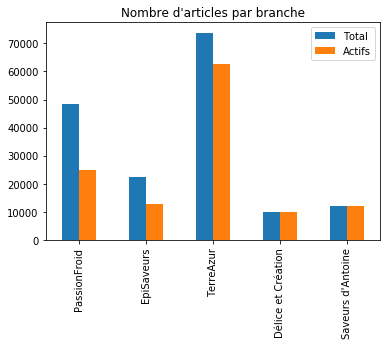

In [82]:
fig, ax = plt.subplots()
report.plot(kind='bar', ax=ax)
ax.set_title('Nombre d\'articles par branche')
ax.set_xlabel('')
fig.savefig(Path('.') / 'img' / 'Articles par branche.png')